# AIAA 2020 Figures for model comparison (Figure 5) 

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from pandas import Timestamp

import matplotlib.dates as mdates 

from mhdpy import *

import mhdpy


In [3]:
finalanalysisfolder = mhdpy.fp.gen_path('mhdlab','Analysis', 'Lee', 'MHDGEN','Final')
dsst = mhdpy.load.loadprocesseddata(os.path.join(finalanalysisfolder, 'Data','dsst'))

ds_p = xr.load_dataset(os.path.join(finalanalysisfolder, 'Data','spectral_data', 'fit_params.cdf'))
ds_p_stderr = xr.load_dataset(os.path.join(finalanalysisfolder, 'Data','spectral_data', 'fit_params_stderr.cdf'))
ds_cantera = xr.load_dataset(os.path.join(finalanalysisfolder,'Data', 'ds_cantera.cdf'))
ds_cfd = xr.load_dataset(os.path.join(finalanalysisfolder,'Data', 'ds_cfd.cdf'))

#TODO: consolidate downselection of all datasets
ds_cfd_sel = ds_cfd.sel(tf=13, method='nearest')

with open(os.path.join(finalanalysisfolder,'Data', 'da_ct.pickle'), 'rb') as file:
    da_ct = pickle.load(file)

# <center> Modeling results

# Wall heat transfers

in cantera ds because the were the ones used in the calculation...

In [4]:
ds_calor = ds_cantera[['wallheattransfer', 'chan_ht', 'comb_ht']]

wht_mean = ds_calor['wallheattransfer'].mean('date', keep_attrs=True)
wht_std = ds_calor['wallheattransfer'].std('date', keep_attrs=True)

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x214d1f2d188>)

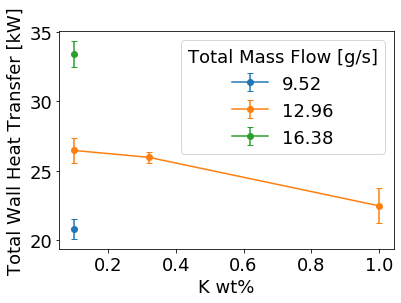

In [5]:
plot.common.xr_errorbar(wht_mean, wht_std, huedim='tf')

In [6]:
da_calor_sel_mean = ds_calor.to_array('var').mean('date', keep_attrs=True).sel(tf=12.9, method='nearest').drop('tf')
da_calor_sel_std = ds_calor.to_array('var').std('date', keep_attrs=True).sel(tf=12.9, method='nearest').drop('tf')

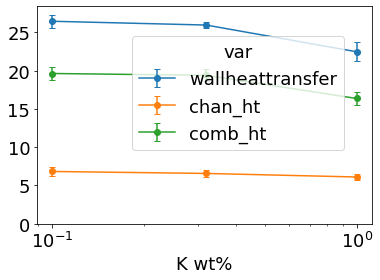

In [7]:
fig ,axes = plot.common.xr_errorbar(da_calor_sel_mean,da_calor_sel_std, huedim='var')

# axes.set_ylabel('Heat Transfer')

axes.set_ylim(0)

axes.get_legend().set_bbox_to_anchor([0,0.1,1.2,1])

plt.xscale('log')

Text(0, 0.5, '$\\dot{Q} \\  [kW]$')

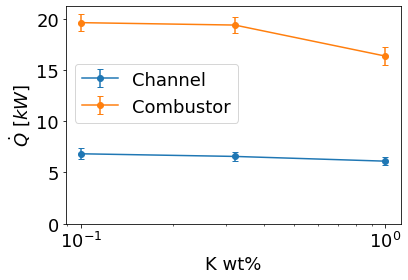

In [8]:
fig ,axes = plot.common.xr_errorbar(da_calor_sel_mean.drop('wallheattransfer', 'var'),da_calor_sel_std.drop('wallheattransfer', 'var'), huedim='var')

# axes.set_ylabel('Heat Transfer')

axes.set_ylim(0)

handles, labels = axes.get_legend_handles_labels()
axes.legend(handles, ['Channel', 'Combustor'])

axes.get_legend().set_bbox_to_anchor([0,0.1,1.2,1])

plt.xscale('log')
plt.ylabel('$\dot{Q} \  [kW]$')

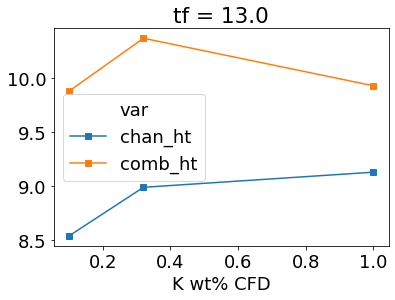

In [9]:
ds_cfd_sel[['chan_ht', 'comb_ht']].to_array('var').plot(hue='var', marker='s')

(0, 27)

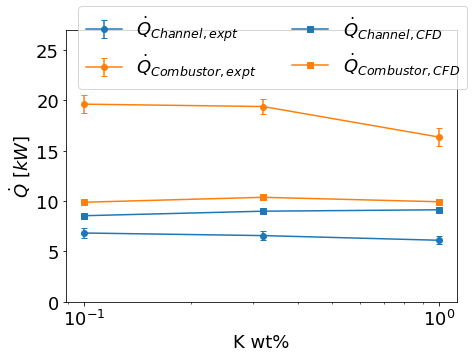

In [10]:
fig ,axes = plot.common.xr_errorbar(da_calor_sel_mean.drop('wallheattransfer', 'var'),da_calor_sel_std.drop('wallheattransfer', 'var'), huedim='var')

handles_1, labels_1 = axes.get_legend_handles_labels()
plt.gca().set_prop_cycle(None)

lns = ds_cfd_sel[['chan_ht', 'comb_ht']].to_array('var').plot(hue='var', marker='s', ax=axes,)

# axes.set_ylabel('Heat Transfer')

axes.set_ylim(0)

# 
axes.legend([*handles_1, *lns], ['$\dot{Q}_{Channel, expt}$', '$\dot{Q}_{Combustor, expt}$', '$\dot{Q}_{Channel, CFD}$', '$\dot{Q}_{Combustor, CFD}$'], ncol=2)

axes.get_legend().set_bbox_to_anchor([0,0.1,1.05,1.02])

plt.xscale('log')
plt.xlabel('K wt%')
plt.ylabel('$\dot{Q} \  [kW]$')
axes.set_title('')
fig.set_size_inches(7,5)
plt.ylim(0,27)

# Outlet Temperature

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


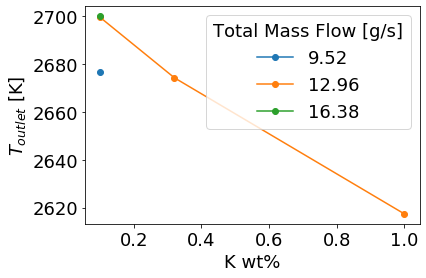

In [11]:
ds_cantera['T'].mean('date',keep_attrs=True).plot(hue='tf', marker ='o')

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


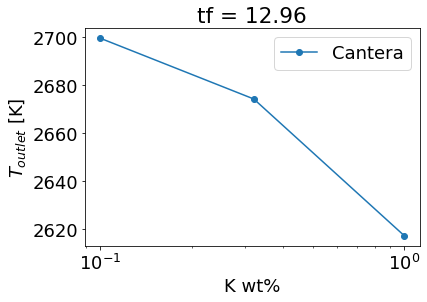

In [12]:
ds_cantera['T'].mean('date',keep_attrs=True).sel(tf=13, method='nearest').plot(marker ='o', label='Cantera')
plt.legend()
plt.xscale('log')

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


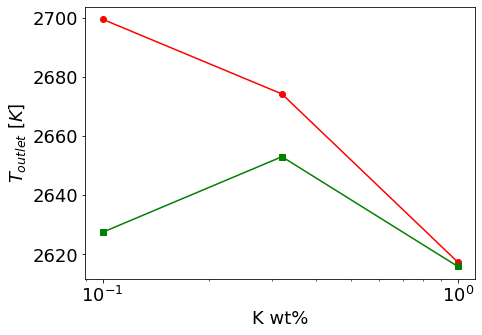

In [13]:
ds_cantera['T'].mean('date',keep_attrs=True).sel(tf=13, method='nearest').plot(marker ='o', label='Cantera', color='r')
ds_cfd_sel['T_outlet'].plot(label='CFD', marker ='s', color='g')
# plt.legend()
plt.xscale('log')
plt.xlabel('K wt%')
plt.ylabel('$T_{outlet} \ [K]$')
plt.gca().set_title('')
plt.gcf().set_size_inches(7,5)

# Potassium number denisty

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


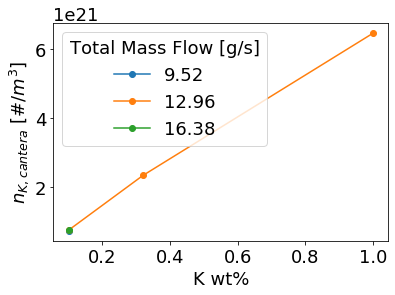

In [14]:
ds_cantera['nK_cant'].mean('date',keep_attrs=True).plot(hue='tf', marker ='o')

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


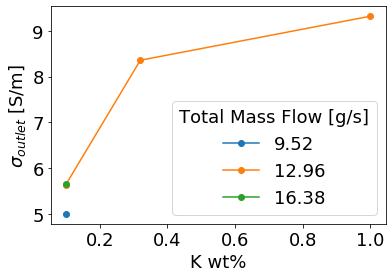

In [15]:
ds_cantera['sigma'].mean('date',keep_attrs=True).plot(hue='tf', marker ='o')

## <center> Modeling and Experiment Comparison for TF = 13 g/s

In [16]:
nK_expt = ds_p['nK_m3']
nK_expt.name ='nK_expt'
nK_expt_err = ds_p_stderr['nK_m3']

da_nK_out = ds_cantera['nK_cant'].sel(tf=12.9, method='nearest').mean('date', keep_attrs=True)

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0, 0.5, '$n_K [\\#/m^3]$')

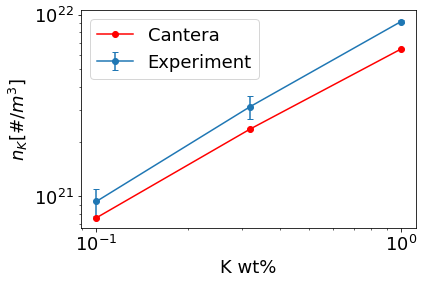

In [17]:
nK_expt_mean = nK_expt.mean('date', keep_attrs=True).sel(tf=12.9, method='nearest')
nK_expt_std = nK_expt.std('date', keep_attrs=True).sel(tf=12.9, method='nearest')

fig, axes = plot.common.xr_errorbar(nK_expt_mean, nK_expt_std, label = 'Experiment')
da_nK_out.plot(marker='o', ax= axes, label = 'Cantera', color='r')
plt.legend()

plt.gca().set_title('')
plt.yscale('log')
plt.xscale('log')

plt.ylabel('$n_K [\\#/m^3]$')

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


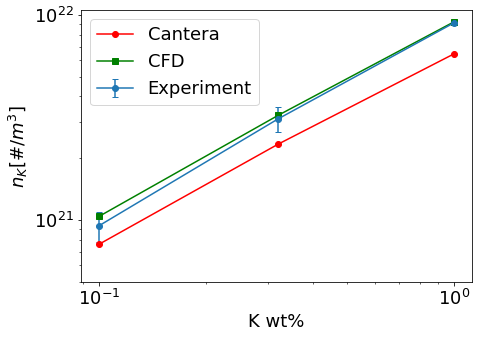

In [18]:
nK_expt_mean = nK_expt.mean('date', keep_attrs=True).sel(tf=12.9, method='nearest')
nK_expt_std = nK_expt.std('date', keep_attrs=True).sel(tf=12.9, method='nearest')

fig, axes = plot.common.xr_errorbar(nK_expt_mean, nK_expt_std, label = 'Experiment')
da_nK_out.plot(marker='o', ax= axes, label = 'Cantera', color='r')
ds_cfd_sel['nK'].plot(marker='s', ax= axes, label = 'CFD', color='g')
plt.legend()

plt.gca().set_title('')
plt.yscale('log')
plt.xscale('log')
plt.ylim(5e20)


plt.ylabel('$n_K [\\#/m^3]$')
plt.xlabel('K wt%')
plt.gcf().set_size_inches(7,5)

# calculate experimental resistance vs experimental nK

In [19]:
ds = analysis.ct.assign_tc_general(dsst['nhr'],da_ct)

da_mean, da_std = analysis.gen.bin_gen(ds, curname='I', voltname='V')

da_mean_highV = da_mean.sel(voltage=slice(50,100))#.drop(0.0, 'Kwt')

resist = da_mean_highV.coords['voltage']/da_mean_highV
resist = resist.mean('voltage', keep_attrs=True)
resist.attrs = dict(long_name = 'Resistance (50-100V) ', units = 'ohms')
resist = resist.where(resist>0)
resist = resist.where(resist<5000)
resist.name = 'resistance'

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [20]:
ds = xr.merge([resist,nK_expt])#.mean('date', keep_attrs=True).plot.scatter(y='resistance', x='nK')

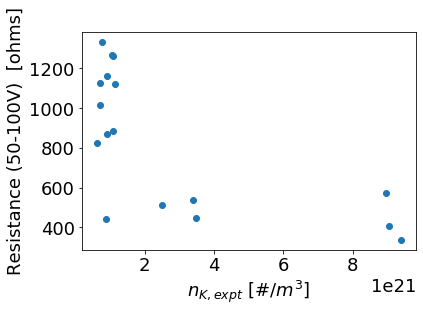

In [21]:
ds.plot.scatter(x='nK_expt', y='resistance')

## Assign nK as a coordinate to resistance

In [22]:
seldicts = analysis.xr.gen_seldicts(ds['resistance'].isel(Kwt=0))
seldicts

rs = []

for seldict in seldicts:
    nK_sel = ds['nK_expt'].sel(seldict)
    r_sel = ds['resistance'].sel(seldict)
    r_sel = r_sel.assign_coords(Kwt=nK_sel.values).dropna('Kwt','all').rename(Kwt='nK_expt')
    r_sel = r_sel.expand_dims('date').expand_dims('tf')
    rs.append(r_sel)
    
r_nK = xr.merge(rs)['resistance']
r_nK.coords['nK_expt'].attrs = ds['nK_expt'].attrs

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


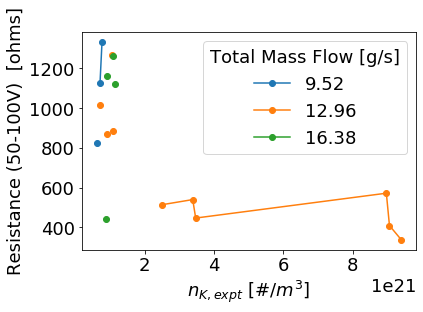

In [23]:
g = r_nK.mean('date', keep_attrs=True).plot(hue='tf', marker='o')

## Bin the nK coordinate

In [24]:
#Test out calculating coord bin standard deviations without having to return it yet in fix_coord_grid_bins and break code
from scipy.stats import binned_statistic

# bins = [0,3e20,9e20,1e22]
raw_coords = r_nK.coords['nK_expt'].values
bins = [0, *np.logspace(np.log10(raw_coords.min())+0.5, np.log10(raw_coords.max())+0.1, 3)]
bins

bin_means, bin_edges, binnumber = binned_statistic(raw_coords, raw_coords, 'mean', bins)
bin_means = bin_means[~np.isnan(bin_means)]
bin_std, bin_edges, binnumber = binned_statistic(raw_coords, raw_coords, 'std', bins)
bin_std = bin_std[~np.isnan(bin_std)]



In [25]:
r_nK_bin = analysis.xr.fix_coord_grid(r_nK, 'nK_expt',  bin_means, keep_attrs=True)
r_nK_bin, r_nK_bin_stack = analysis.ct.reset_da_ct(r_nK_bin, keep_attrs=True)
r_nK_bin

Fixing coord nK_expt to grid values [8.92699520e+20 3.11427745e+21 9.14581507e+21]
             ---Old Coords---
[6.14259960e+20 6.93221973e+20 7.06541533e+20 7.64895775e+20
 8.70545157e+20 9.02902724e+20 9.15773875e+20 1.05338395e+21
 1.06991414e+21 1.09612072e+21 1.13213491e+21 2.49008099e+21
 3.38343555e+21 3.46931582e+21 8.97333436e+21 9.06325180e+21
 9.40085906e+21]
             ---New Coords---
[8.926995195109485e+20, 8.926995195109485e+20, 8.926995195109485e+20, 8.926995195109485e+20, 8.926995195109485e+20, 8.926995195109485e+20, 8.926995195109485e+20, 8.926995195109485e+20, 8.926995195109485e+20, 8.926995195109485e+20, 8.926995195109485e+20, 3.1142774536940463e+21, 3.1142774536940463e+21, 3.1142774536940463e+21, 9.145815072974629e+21, 9.145815072974629e+21, 9.145815072974629e+21]


<xarray.DataArray 'resistance' (date: 4, nK_expt: 3, tf: 3)>
array([[[          nan,  883.07801089, 1260.91016872],
        [          nan,  539.72409844,           nan],
        [          nan,  408.94948106,           nan]],

       [[1124.01780528, 1016.3289112 , 1162.58585537],
        [          nan,           nan,           nan],
        [          nan,           nan,           nan]],

       [[1333.08661351, 1266.83983318, 1121.36455432],
        [          nan,  446.76137957,           nan],
        [          nan,  338.24479836,           nan]],

       [[ 822.03160284,  871.41404802,  439.78028226],
        [          nan,  513.70503034,           nan],
        [          nan,  571.82906399,           nan]]])
Coordinates:
  * date     (date) object '2020-03-13' '2020-06-11' '2020-06-23' '2020-07-01'
  * nK_expt  (nK_expt) float64 8.927e+20 3.114e+21 9.146e+21
  * tf       (tf) float64 9.52 12.96 16.38
Attributes:
    long_name:  Resistance (50-100V) 
    units:      ohms

In [26]:
r_nK_mean = r_nK_bin.mean('date', keep_attrs=True)
r_nK_std = r_nK_bin.std('date', keep_attrs=True)

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


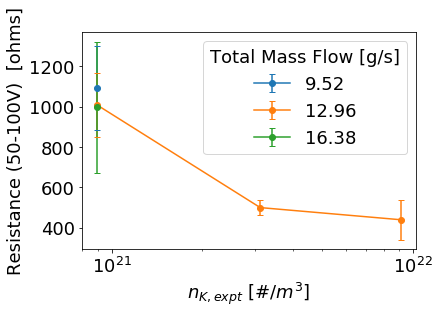

In [27]:
plot.common.xr_errorbar(r_nK_mean, r_nK_std, huedim='tf')
plt.xscale('log')

In [28]:
conductance = 1/r_nK_bin
conductance.name = 'conductance'
conductance.attrs = dict(long_name='Conductance (50-100V)', units = 'S')

conductance_mean = conductance.mean('date', keep_attrs=True)
conductance_std = conductance.std('date', keep_attrs=True)

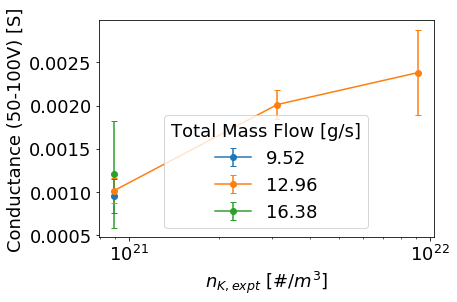

In [29]:
plot.common.xr_errorbar(conductance_mean, conductance_std, huedim='tf')
plt.xscale('log')

Plot with x error 

have to downselect to one total flow case right now

In [32]:
r_nK_mean = r_nK_bin.mean('date', keep_attrs=True).sel(tf=12.9,method='nearest')
r_nK_std = r_nK_bin.std('date').sel(tf=12.9,method='nearest')

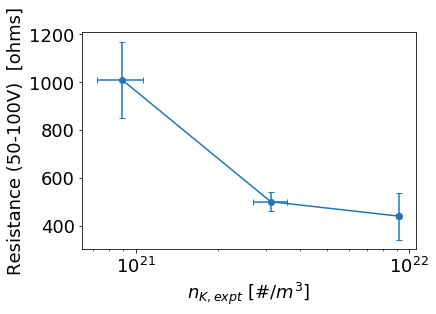

In [33]:
plot.common.xr_errorbar(r_nK_mean, r_nK_std, xerr=bin_std)
plt.xscale('log')

In [34]:
r_nK_bin

<xarray.DataArray 'resistance' (date: 4, nK_expt: 3, tf: 3)>
array([[[          nan,  883.07801089, 1260.91016872],
        [          nan,  539.72409844,           nan],
        [          nan,  408.94948106,           nan]],

       [[1124.01780528, 1016.3289112 , 1162.58585537],
        [          nan,           nan,           nan],
        [          nan,           nan,           nan]],

       [[1333.08661351, 1266.83983318, 1121.36455432],
        [          nan,  446.76137957,           nan],
        [          nan,  338.24479836,           nan]],

       [[ 822.03160284,  871.41404802,  439.78028226],
        [          nan,  513.70503034,           nan],
        [          nan,  571.82906399,           nan]]])
Coordinates:
  * date     (date) object '2020-03-13' '2020-06-11' '2020-06-23' '2020-07-01'
  * nK_expt  (nK_expt) float64 8.927e+20 3.114e+21 9.146e+21
  * tf       (tf) float64 9.52 12.96 16.38
Attributes:
    long_name:  Resistance (50-100V) 
    units:      ohms

In [35]:
#qucikly make consistent with other plots...hacky....

r_nK_bin_kohm = r_nK_bin/1000
r_nK_bin_kohm.attrs = dict(long_name='$R_{expt}$ (50-100V)', units ='Kohm')

r_nK_kohm_mean = r_nK_bin_kohm.mean('date', keep_attrs=True).sel(tf=12.9,method='nearest')
r_nK_kohm_std = r_nK_bin_kohm.std('date').sel(tf=12.9,method='nearest')

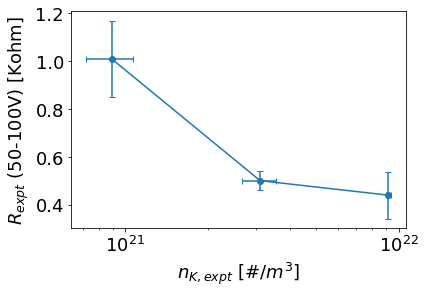

In [38]:
plot.common.xr_errorbar(r_nK_kohm_mean, r_nK_kohm_std, xerr=bin_std)
plt.xscale('log')

In [31]:
conductance = 1/r_nK_bin
conductance.name = 'conductance'
conductance.attrs = dict(long_name='Conductance (50-100V)', units = 'S')

conductance_mean = conductance.mean('date', keep_attrs=True).sel(tf=12.9,method='nearest')
conductance_std = conductance.std('date', keep_attrs=True).sel(tf=12.9,method='nearest')

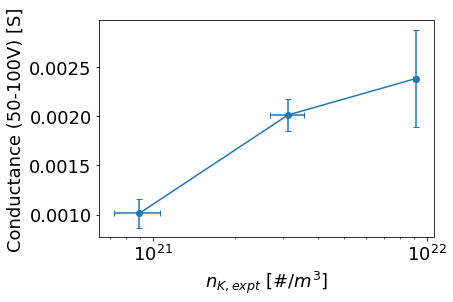

In [32]:
plot.common.xr_errorbar(conductance_mean, conductance_std, xerr=bin_std)
plt.xscale('log')

# calculate cantera resistance vs cantera nK

this requires binning with cantera unlike before, because now the values have been calculated for each separate measured heat transfer

In [33]:
seldicts = analysis.xr.gen_seldicts(ds_cantera.isel(Kwt=0))

dss = []

for seldict in seldicts:
    nK_sel = ds_cantera['nK_cant'].sel(seldict)
    ds_sel = ds_cantera.drop('nK_cant').sel(seldict)
    ds_sel = ds_sel.assign_coords(Kwt=nK_sel.values).dropna('Kwt','all').rename(Kwt='nK_cant')
    ds_sel = ds_sel.expand_dims('date').expand_dims('tf')
    dss.append(ds_sel)
    
ds_cantera_nK = xr.merge(dss)

ds_cantera_nK = analysis.xr.fix_coord_grid_bins(ds_cantera_nK, 'nK_cant', [0,1e21, 5e21, 1e23])

ds_cantera_nK, ds_cantera_nK_stack = analysis.ct.reset_da_ct(ds_cantera_nK, keep_attrs=True)
ds_cantera_nK.coords['nK_cant'].attrs = ds_cantera['nK_cant'].attrs

Fixing coord nK_cant to grid values [7.54917201e+20 2.34427685e+21 6.45523597e+21]
             ---Old Coords---
[7.21664818e+20 7.43473145e+20 7.46528006e+20 7.50896769e+20
 7.50968123e+20 7.56488448e+20 7.60763820e+20 7.61303959e+20
 7.64517267e+20 7.72964534e+20 7.74520324e+20 2.33197228e+21
 2.33462089e+21 2.36623738e+21 6.21936049e+21 6.46796669e+21
 6.67838074e+21]
             ---New Coords---
[7.549172011720819e+20, 7.549172011720819e+20, 7.549172011720819e+20, 7.549172011720819e+20, 7.549172011720819e+20, 7.549172011720819e+20, 7.549172011720819e+20, 7.549172011720819e+20, 7.549172011720819e+20, 7.549172011720819e+20, 7.549172011720819e+20, 2.3442768496690997e+21, 2.3442768496690997e+21, 2.3442768496690997e+21, 6.455235972397895e+21, 6.455235972397895e+21, 6.455235972397895e+21]


C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, '')

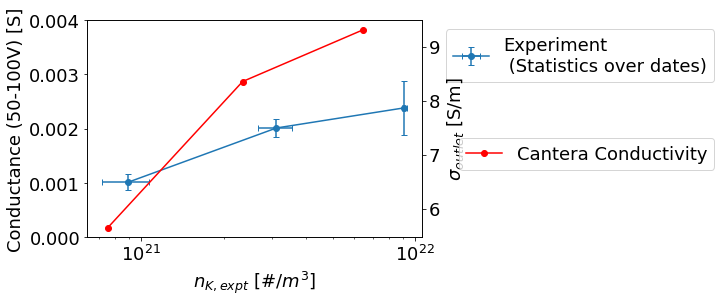

In [34]:
fig, axes = plot.common.xr_errorbar(conductance_mean, conductance_std, xerr=bin_std)
axes.legend(['Experiment\n (Statistics over dates)'])
axes.get_legend().set_bbox_to_anchor([0,0,1.9,1])
plt.xscale('log')
plt.ylim(0,4e-3)

t = plt.gca().twinx()
# ds_cantera_nK['sigma'].mean('date', keep_attrs=True).sel(tf=12.9,method='nearest').plot(ax=t, marker ='o')
ds_cantera_nK['sigma'].mean('date', keep_attrs=True).sel(tf=12.9, method='nearest').plot(ax=t, color='r', marker ='o', label = 'Cantera Conductivity')
# t.set_ylim(0,5.1)
t.arrow(1e21,1,1e20,0, color = 'red', width = 0.1, head_length = 5e19)
t.legend(bbox_to_anchor=[0,0,1.9,0.5])
t.set_title('')

Interploate

Attempt cantera conductance 

In [35]:
ds_cantera['G_cantera']

<xarray.DataArray 'G_cantera' (date: 4, Kwt: 3, tf: 3)>
array([[[       nan, 0.00478398, 0.00452149],
        [       nan, 0.00679973,        nan],
        [       nan, 0.00817304,        nan]],

       [[0.00402619, 0.00444121, 0.00474185],
        [       nan,        nan,        nan],
        [       nan,        nan,        nan]],

       [[0.00419273, 0.00442785, 0.00432396],
        [       nan, 0.00643013,        nan],
        [       nan, 0.0064442 ,        nan]],

       [[0.00358182, 0.0040937 , 0.00419438],
        [       nan, 0.00645786,        nan],
        [       nan, 0.00732891,        nan]]])
Coordinates:
  * date     (date) object '2020-03-13' '2020-06-11' '2020-06-23' '2020-07-01'
  * Kwt      (Kwt) float64 0.1 0.32 1.0
  * tf       (tf) float64 9.52 12.96 16.38
Attributes:
    long_name:  Conductance
    units:      S

In [36]:
G_cantera = ds_cantera_nK['G_cantera']
R_cantera = ds_cantera_nK['R_cantera']
# G.coords['nK_cant'].attrs = dict(long_name='$n_K$', units = '$\\#/m^3$')

This match was made on the first try (using the same parameters at the AIAA abstract)

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\aspit\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


Text(0.5, 0, '$n_K \\ [\\#/m^3]$')

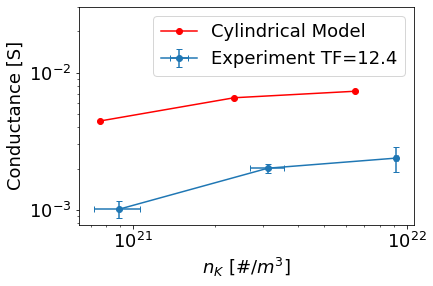

In [37]:
fig, axes = plot.common.xr_errorbar(conductance_mean, conductance_std, xerr=bin_std, label = 'Experiment TF=12.4')
G_cantera.mean('date', keep_attrs=True).sel(tf=12.9, method='nearest').plot(color='r', marker ='o', label = 'Cylindrical Model')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim(0,0.03)
axes.set_title('')
plt.xlabel('$n_K \ [\#/m^3]$')

C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


(100.0, 1500.0)

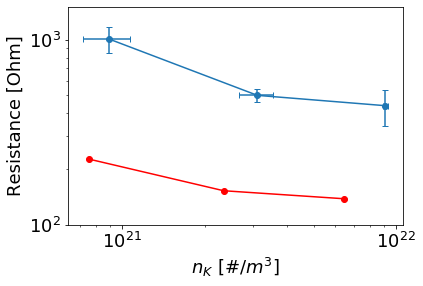

In [47]:
fig, axes = plot.common.xr_errorbar(r_nK_mean, r_nK_std, xerr=bin_std, label='Experiment')
R_cantera.mean('date', keep_attrs=True).sel(tf=12.9, method='nearest').plot(color='r', marker ='o', label = 'Cantera')
plt.xscale('log')
plt.yscale('log')
# plt.legend(bbox_to_anchor=[0,0,1,0.9])
# plt.ylim(0,0.03)
axes.set_title('')
plt.xlabel('$n_K \ [\#/m^3]$')
plt.ylabel('Resistance [Ohm]')
plt.ylim(1e2,1.5e3)

## Calculate CFD resistance vs nK

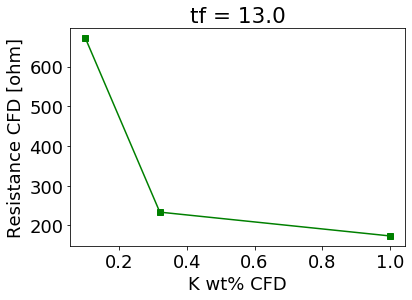

In [39]:
ds_cfd_sel['resistance'].plot(marker='s', label = 'CFD', color='g')

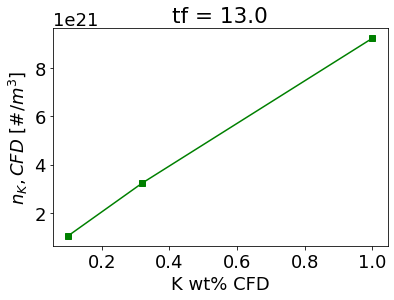

In [40]:
ds_cfd_sel['nK'].plot(marker='s', label = 'CFD', color='g')

In [41]:
seldicts = analysis.xr.gen_seldicts(ds_cfd.isel(Kwt=0))

dss = []

for seldict in seldicts:
    nK_sel = ds_cfd['nK'].sel(seldict)
    ds_sel = ds_cfd.drop('nK').sel(seldict)
    ds_sel = ds_sel.assign_coords(Kwt=nK_sel.values).dropna('Kwt','all').rename(Kwt='nK')
    ds_sel = ds_sel.expand_dims('date').expand_dims('tf')
    dss.append(ds_sel)
    
ds_cfd_nK = xr.merge(dss)

ds_cfd_nK = analysis.xr.fix_coord_grid_bins(ds_cfd_nK, 'nK', [0,2e21, 5e21, 1e23])

ds_cfd_nK, ds_cfd_nK_stack = analysis.ct.reset_da_ct(ds_cfd_nK, keep_attrs=True)
ds_cfd_nK.coords['nK'].attrs = ds_cfd['nK'].attrs

Fixing coord nK to grid values [1.03e+21 3.24e+21 9.25e+21]
             ---Old Coords---
[8.70e+20 1.04e+21 1.18e+21 3.24e+21 9.25e+21]
             ---New Coords---
[1.03e+21, 1.03e+21, 1.03e+21, 3.24e+21, 9.25e+21]


C:\Users\aspit\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 0, '$n_K \\ [\\#/m^3]$')

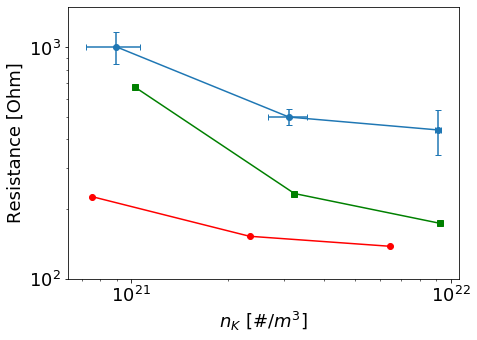

In [42]:
fig, axes = plot.common.xr_errorbar(r_nK_mean, r_nK_std, xerr=bin_std, label='Experiment')
R_cantera.mean('date', keep_attrs=True).sel(tf=12.9, method='nearest').plot(color='r', marker ='o', label = 'Cylindrical Model')
ds_cfd_nK.sel(tf=12.9, method='nearest')['resistance'].plot(marker='s', label = 'CFD', color='g', ax=axes)
plt.xscale('log')
plt.yscale('log')
# plt.legend(bbox_to_anchor=[0,0,1,0.9])
plt.ylim(1e2,1.5e3)
axes.set_title('')

plt.ylabel('Resistance [Ohm]')
plt.gcf().set_size_inches(7,5)
axes.set_xlabel('$n_K \ [\#/m^3]$')